In [1]:
import os
import xml.etree.ElementTree as ElementTree
import html
import numpy as np

import matplotlib.pyplot as plt

In [2]:
# path = 'original-xml-part/original/a01/a01-001/strokesz.xml'
path = '../../HandSynth/original-xml-part/original/a03/a03-193/strokesz.xml'
xml = ElementTree.parse(path).getroot()
transcription = xml.findall('Transcription')
textline_list = [html.unescape(tl.get('text')) for tl in transcription[0].findall('TextLine')]
textline_list

['This emphasis on the le-',
 'gality of the former Government',
 'suggests that all ist not well',
 'with the political and mili-',
 'tary leadership of the pro-',
 'communists. A correspondent who',
 'travelled yesterday to wh within',
 'a few miles of Vang Vieng was',
 'told by officers that this village was',
 'still held by the pro-communists.']

In [3]:
strokes = []
stroke_list = [strk.findall('Point') for strk in xml.findall('StrokeSet/Stroke')]

for stroke in stroke_list[:20]:   # taking first line only
    point_list = np.array([[int(point.get('x')), int(point.get('y')), 0] for point in stroke])
    point_list[-1, 2] = 1
    strokes += [point_list]

In [4]:
X = []
Y = []

for stroke in strokes:
    X.append(np.array([x for x,y,z in stroke]))
    Y.append(np.array([-y for x,y,z in stroke]))

print(len(X))
print(len(Y))

20
20


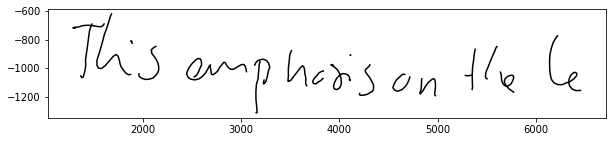

In [5]:
plt.figure(figsize=(10,2))
for x,y in zip(X, Y):
    plt.plot(x, y, c='black')
plt.show()

In [7]:
X_flat = np.concatenate(X)
Y_flat = np.concatenate(Y)

In [8]:
x_min = np.min(X_flat) - 10
x_max = np.max(X_flat) + 10
y_min = np.min(Y_flat) - 10
y_max = np.max(Y_flat) + 10
print(f"Y :: ({y_min}, {y_max}), X :: ({x_min}, {x_max})")

Y :: (-1325, -610), X :: (1283, 6461)


In [9]:
stroke_len = len(Y_flat) # or len(X_flat)

In [10]:
x_data = []
y_data = []

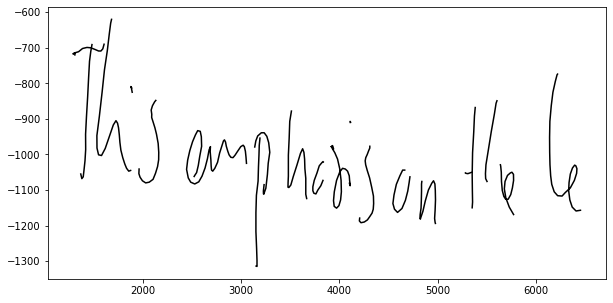

In [11]:
plt.figure(figsize=(10,5))
for x,y in zip(X, Y):
    plt.plot(x, y, c='black')
plt.show()

# Considered from now on

### Reading first line from saved np array 

In [2]:
super_temp_dataset = np.load('./data/100samp/dataset.npy', allow_pickle=True)

In [6]:
line1 = super_temp_dataset[0]
line1.shape

(432, 3)

In [7]:
# SEGMENTATION OF LINES
temp_x = []
temp_y = []
temp_x_data = []
temp_y_data = []

for x, y, br in line1:
    if br == 0:
        temp_x_data.append(x)
        temp_y_data.append(y)
    else: 
        temp_x_data.append(x)
        temp_y_data.append(y)
        temp_x.append(temp_x_data)
        temp_y.append(temp_y_data)

        temp_x_data = []
        temp_y_data = []

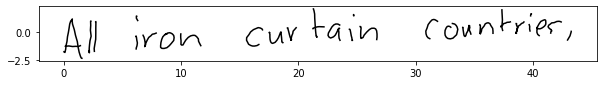

In [8]:
plt.figure(figsize=(10,1))
for x, y in zip(temp_x, temp_y):
    plt.plot(x, -np.array(y), c='black')
plt.show()

# Animation

In [6]:
from matplotlib.animation import FuncAnimation

In [15]:
stroke_len = line1.shape[0]

In [12]:
X_data = list()
Y_data = list()

def animation_frame(i):
    global X_data, Y_data
    
    if i == 0 :
        x_data = []
        y_data = []
    x_data.append(X_flat[i])
    y_data.append(Y_flat[i])

    plt.cla()
    plt.xlim([x_min, x_max]); plt.ylim([y_min, y_max])
    plt.axis('off')
    #==================#
    for x,y in zip(X, Y):
        plt.plot(x, y, c='black')
    #==================#
    plt.plot(x_data, y_data)

In [13]:
animation = FuncAnimation(plt.gcf(), func=animation_frame, frames=range(stroke_len), interval=100)

<Figure size 432x288 with 0 Axes>

In [25]:
# animation.save('strokes.mp4')